# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='# YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city# YOUR CODE HERE
   #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | amga
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | anton lizardo
Processing Record 15 of Set 1 | velur
Processing Record 16 of Set 1 | broken hill
Processing Record 17 of Set 1 | bani walid
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | el galpon
Processing Record 21 of Set 1 | baynjiwayn
Processing Record 22 of Set 1 | l

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,16.14,74,100,3.09,US,1685152722
1,port mathurin,-19.6833,63.4167,25.30,74,61,8.61,MU,1685152722
2,puerto ayora,-0.7393,-90.3518,25.86,93,52,1.34,EC,1685152722
3,east london,-33.0153,27.9116,12.82,54,36,2.47,ZA,1685152723
4,west island,-12.1568,96.8225,26.99,74,75,8.75,CC,1685152724


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\User\Desktop\Bootcamp\Assignments\World_Weather_Analysis\Starter_Code\output_data\cities.csv",index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\User\Desktop\Bootcamp\Assignments\World_Weather_Analysis\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,16.14,74,100,3.09,US,1685152722
1,port mathurin,-19.6833,63.4167,25.30,74,61,8.61,MU,1685152722
2,puerto ayora,-0.7393,-90.3518,25.86,93,52,1.34,EC,1685152722
3,east london,-33.0153,27.9116,12.82,54,36,2.47,ZA,1685152723
4,west island,-12.1568,96.8225,26.99,74,75,8.75,CC,1685152724


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

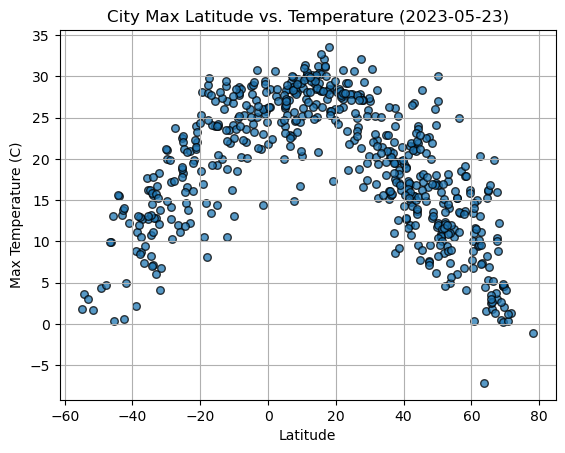

In [8]:
# Build scatter plot for latitude vs. temperature
lat_vs_tem = plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors='black',marker='o',alpha=0.75,s=30)# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-05-23)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# YOUR CODE HERE

# Save the figure
plt.savefig(r"C:\Users\User\Desktop\Bootcamp\Assignments\World_Weather_Analysis\Starter_Code\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

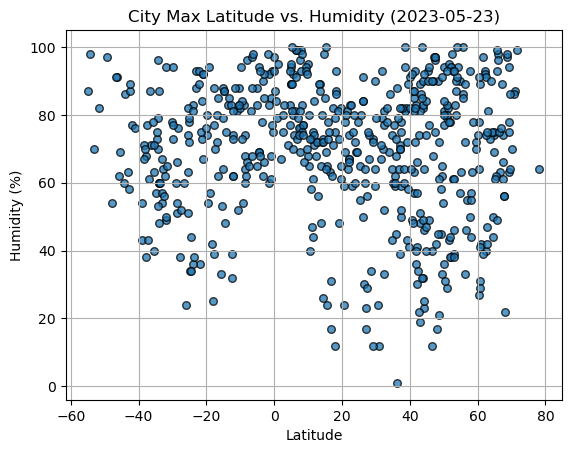

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_vs_hum = plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors='black',marker='o',alpha=0.75,s=30)# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Humidity (2023-05-23)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Save the figure
plt.savefig(r"C:\Users\User\Desktop\Bootcamp\Assignments\World_Weather_Analysis\Starter_Code\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

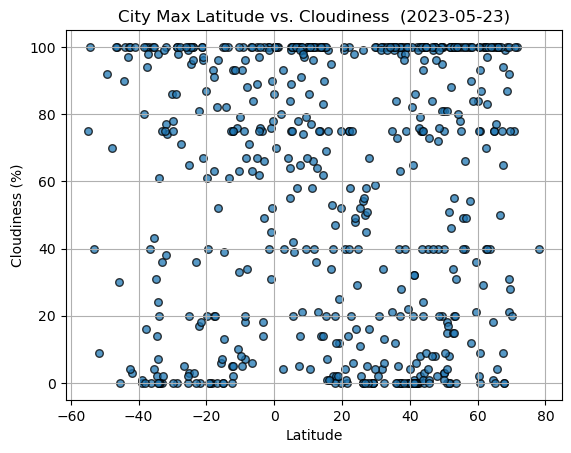

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_clo = plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors='black',marker='o',alpha=0.75,s=30)# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Cloudiness  (2023-05-23)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Save the figure
plt.savefig(r"C:\Users\User\Desktop\Bootcamp\Assignments\World_Weather_Analysis\Starter_Code\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

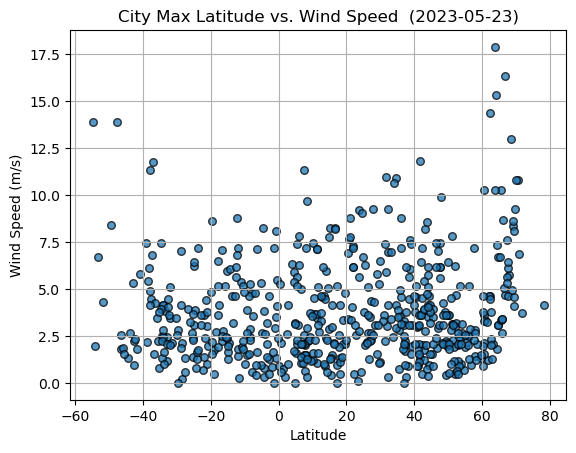

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_win = plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors='black',marker='o',alpha=0.75,s=30)# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Wind Speed  (2023-05-23)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig(r"C:\Users\User\Desktop\Bootcamp\Assignments\World_Weather_Analysis\Starter_Code\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
import scipy.stats as st
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df['Lat']>=0] # YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,16.14,74,100,3.09,US,1685152722
8,longyearbyen,78.2186,15.6401,-1.09,64,40,4.12,SJ,1685152726
9,amga,60.8953,131.9608,11.59,42,87,3.37,RU,1685152726
10,yellowknife,62.4560,-114.3525,20.31,40,40,4.63,CA,1685152726
11,petropavlovsk-kamchatsky,53.0452,158.6483,17.33,39,20,2.00,RU,1685152727


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,25.30,74,61,8.61,MU,1685152722
2,puerto ayora,-0.7393,-90.3518,25.86,93,52,1.34,EC,1685152722
3,east london,-33.0153,27.9116,12.82,54,36,2.47,ZA,1685152723
4,west island,-12.1568,96.8225,26.99,74,75,8.75,CC,1685152724
5,waitangi,-43.9535,-176.5597,15.46,86,100,2.68,NZ,1685152724


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8209484348036723


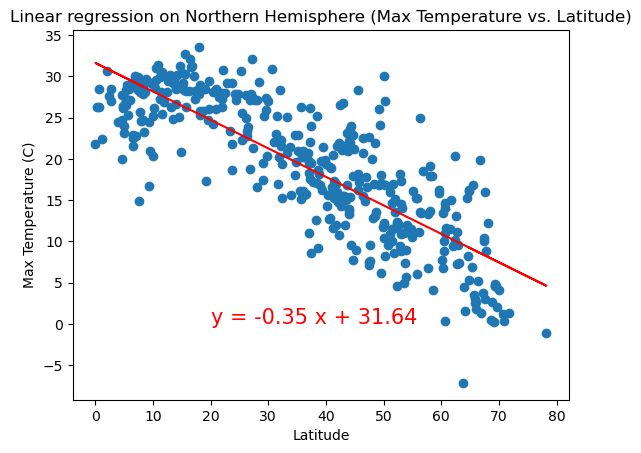

In [15]:
# Linear regression on Northern Hemisphere
# To Find R- Value
lin_reg_nhemi = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
print(f"The r-value is {lin_reg_nhemi[0]}")
# Plot the scatter graph
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
#Liner regression line & Eqation
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(20,0), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("Linear regression on Northern Hemisphere (Max Temperature vs. Latitude)")
plt.show()

#YOUR CODE HERE

The r-value is 0.8015127348716639


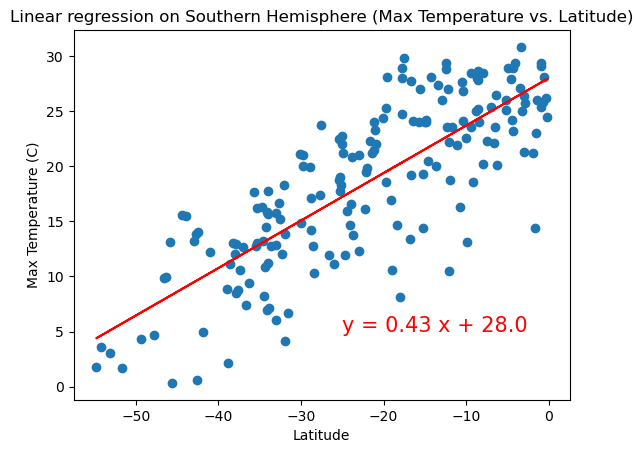

In [16]:
# Linear regression on Southern Hemisphere
# To Find R- Value
lin_reg_shemi = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
print(f"The r-value is {lin_reg_shemi[0]}")
# Plot the scatter graph
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
#Liner regression line & Eqation
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-25,5), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("Linear regression on Southern Hemisphere (Max Temperature vs. Latitude)")
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.10762915709618835


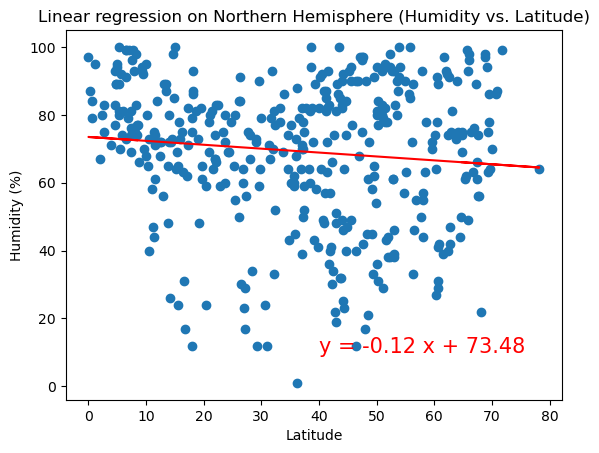

In [17]:
# Northern Hemisphere
# To Find R- Value
lin_reg_nhemi = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
print(f"The r-value is {lin_reg_nhemi[0]}")
# Plot the scatter graph
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
#Liner regression line & Eqation
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(40,10), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("Linear regression on Northern Hemisphere (Humidity vs. Latitude)")
plt.show()
# YOUR CODE HERE

The r-value is 0.15702107293692777


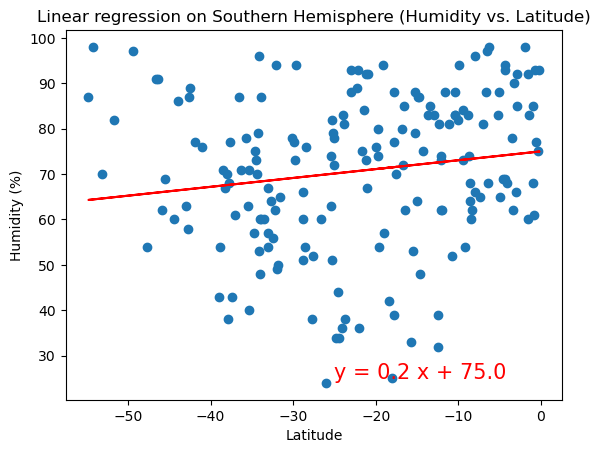

In [18]:
# Southern Hemisphere
# To Find R- Value
lin_reg_shemi = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
print(f"The r-value is {lin_reg_shemi[0]}")
# Plot the scatter graph
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
#Liner regression line & Eqation
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-25,25), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("Linear regression on Southern Hemisphere (Humidity vs. Latitude)")
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.03335196146195295


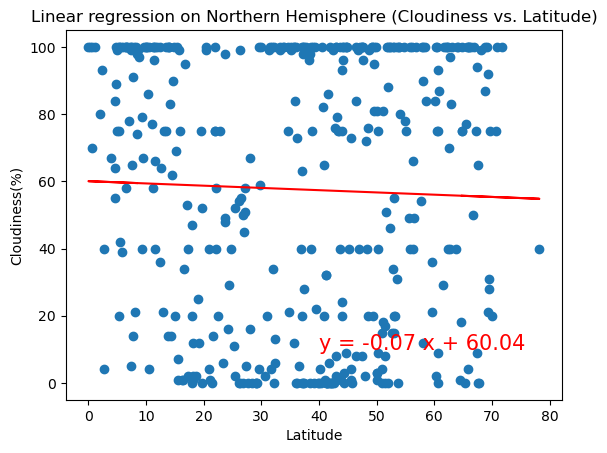

In [19]:
# Northern Hemisphere
# To Find R- Value
lin_reg_nhemi = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
print(f"The r-value is {lin_reg_nhemi[0]}")
# Plot the scatter graph
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
#Liner regression line & Eqation
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(40,10), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness(%)')
plt.title("Linear regression on Northern Hemisphere (Cloudiness vs. Latitude)")
plt.show()
# YOUR CODE HERE

The r-value is 0.06064863004792588


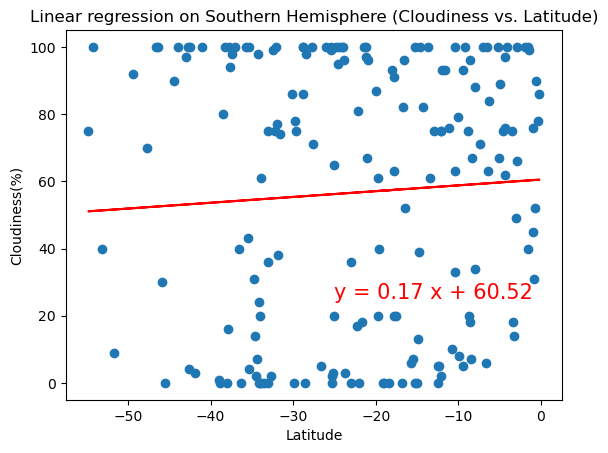

In [20]:
# Southern Hemisphere
# To Find R- Value
lin_reg_shemi = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
print(f"The r-value is {lin_reg_shemi[0]}")
# Plot the scatter graph
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
#Liner regression line & Eqation
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-25,25), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness(%)')
plt.title("Linear regression on Southern Hemisphere (Cloudiness vs. Latitude)")
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.16316364094817715


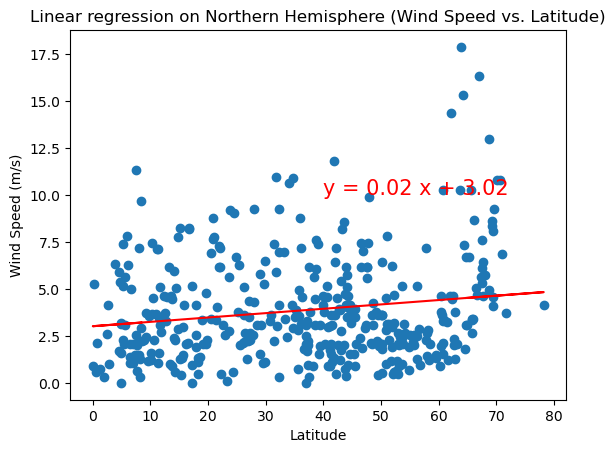

In [21]:
# Northern Hemisphere
lin_reg_nhemi = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
print(f"The r-value is {lin_reg_nhemi[0]}")
# Plot the scatter graph
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
#Liner regression line & Eqation
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(40,10), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("Linear regression on Northern Hemisphere (Wind Speed vs. Latitude)")
plt.show()
# YOUR CODE HERE

The r-value is -0.16949171873499325


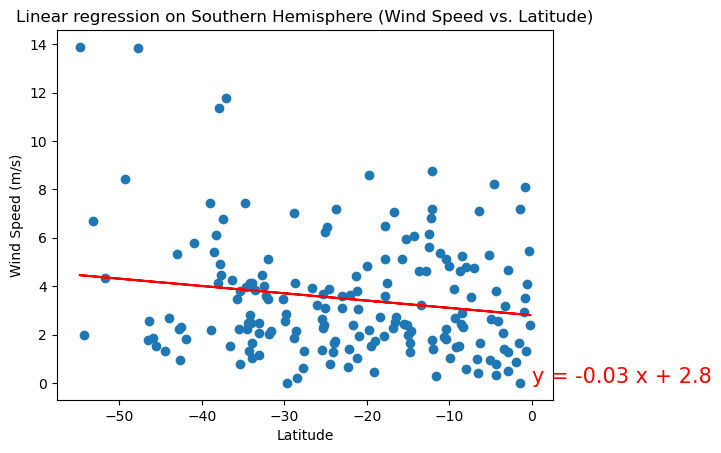

In [22]:
# Southern Hemisphere
lin_reg_shemi = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
print(f"The r-value is {lin_reg_shemi[0]}")
# Plot the scatter graph
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
#Liner regression line & Eqation
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(0,0), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("Linear regression on Southern Hemisphere (Wind Speed vs. Latitude)")
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# a scatter plot to showcase the relationship between Latitude vs. Temperature 
    It shows some patterns between latitude and Temperature data. But not the liner pattern. It is a parabolic curve. 
# a scatter plot to showcase the relationship between Latitude vs. Humidity
    No pattern. Data points all around the plot. Still, some clustered are there
# a scatter plot to showcase the relationship between Latitude vs. Cloudiness
    Most of the data are aligned with cloudiness %. like 100, 0, 75 of Cloudiness
# a scatter plot to showcase the relationship between Latitude vs. Wind Speed
    Wind speed between 0 m/s to 7.5 m/s around the world.
# inear regression scatter plot for Northern Hemisphere: Temperature (C) vs. Latitude
    Strong negative relation. The higher the latitude lower the temperature and vice versa.
# Linear regression scatter plot for Southern Hemisphere: Temperature (C) vs. Latitude 
    Strong positive relation. The higher the latitude higher the temperature.
# Linear regression scatter plot for Northern Hemisphere: Humidity (%) vs. Latitude 
    No Co-relation no linear regression. 
# Linear regression scatter plot for Southern Hemisphere: Humidity (%) vs. Latitude 
    r value < 0.3 shows a weak correlation.
# Linear regression scatter plot for Northern Hemisphere: Cloudiness (%) vs. Latitude 
    Weak Liner regression as data aligned with 100% or 0%
# Linear regression scatter plot for Southern Hemisphere: Cloudiness (%) vs. Latitude 
    Weak Liner regression as data aligned with 100% or 0%
# Linear regression scatter plot for Northern/Southern Hemisphere: Wind Speed (m/s) vs. Latitude 
    Wind speed data gathered towards latitude 0. Wind speed is 0-3.5 m/s  and wind speed may vary toward the north n south poles.
# Suggestions. 
Weather condition comparison with latitude and Longitude will provide more value than latitude vs weather conditions